In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time


In [2]:
# 載入 MNIST 數據集
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers as klayers

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
# 確保數據為正確形狀
print(f"原始 x_train 形狀: {x_train.shape}")  # 應該是 (60000, 28, 28)
print(f"原始 x_test 形狀: {x_test.shape}")  # 應該是 (10000, 28, 28)

# 進行 reshape
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype("float32") / 255

# 確保 reshape 後正確
print(f"Reshape 後 x_train 形狀: {x_train.shape}")  # 應該是 (60000, 784)
print(f"Reshape 後 x_test 形狀: {x_test.shape}")  # 應該是 (10000, 784)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

原始 x_train 形狀: (60000, 28, 28)
原始 x_test 形狀: (10000, 28, 28)
Reshape 後 x_train 形狀: (60000, 784)
Reshape 後 x_test 形狀: (10000, 784)


In [4]:
# 建立 MLP 模型
def build_mnist_model(hidden_layers=1, neurons=128, activation='relu'):
    model = models.Sequential()
    model.add(klayers.Dense(neurons, activation=activation, input_shape=(784,)))
    for _ in range(hidden_layers - 1):
        model.add(klayers.Dense(neurons, activation=activation))
    model.add(klayers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

訓練模型: 1 層, 128 神經元, relu 激活函數, batch_size=32, epochs=10


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8789 - loss: 0.4301 - val_accuracy: 0.9596 - val_loss: 0.1330
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9653 - loss: 0.1207 - val_accuracy: 0.9694 - val_loss: 0.0949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9773 - loss: 0.0771 - val_accuracy: 0.9724 - val_loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9755 - val_loss: 0.0789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9757 - val_loss: 0.0713
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accuracy: 0.9802 - val_loss: 0.0653
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.9766 - val_loss: 0.0765
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0196 - 

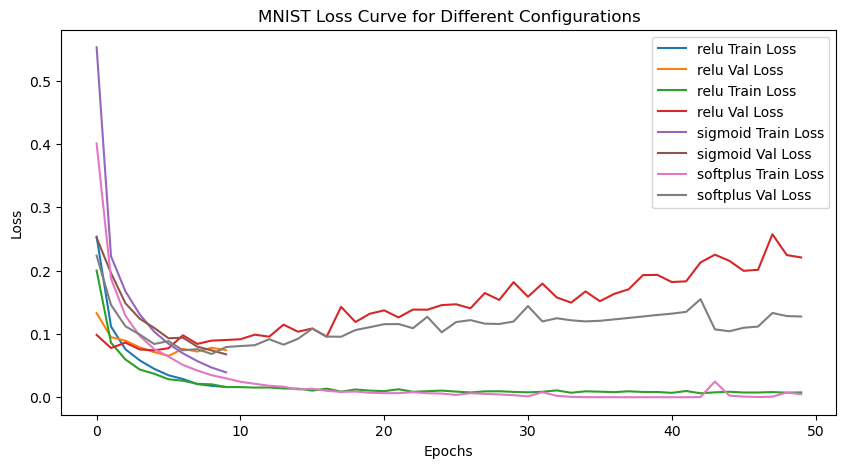

In [5]:
# 測試不同架構 + 不同 batch size & epoch
configurations = [
    (1, 128, 'relu', 32, 10),
    (2, 256, 'relu', 32, 50),
    (2, 256, 'sigmoid', 128, 10),
    (2, 256, 'softplus', 128, 50)
]

results_mnist = {}
training_histories = {}

plt.figure(figsize=(10, 5))
for hidden_layers, neurons, activation, batch_size, epochs in configurations:
    print(f"訓練模型: {hidden_layers} 層, {neurons} 神經元, {activation} 激活函數, batch_size={batch_size}, epochs={epochs}")
    model = build_mnist_model(hidden_layers, neurons, activation)
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
    end_time = time.time()
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
    training_time = end_time - start_time
    
    results_mnist[f"{hidden_layers} layers, {neurons} neurons, {activation}, batch {batch_size}, {epochs} epochs"] = (test_acc, training_time)
    training_histories[f"{hidden_layers}-{neurons}-{activation}"] = history
    
    plt.plot(history.history['loss'], label=f"{activation} Train Loss")
    plt.plot(history.history['val_loss'], label=f"{activation} Val Loss")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MNIST Loss Curve for Different Configurations")
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  

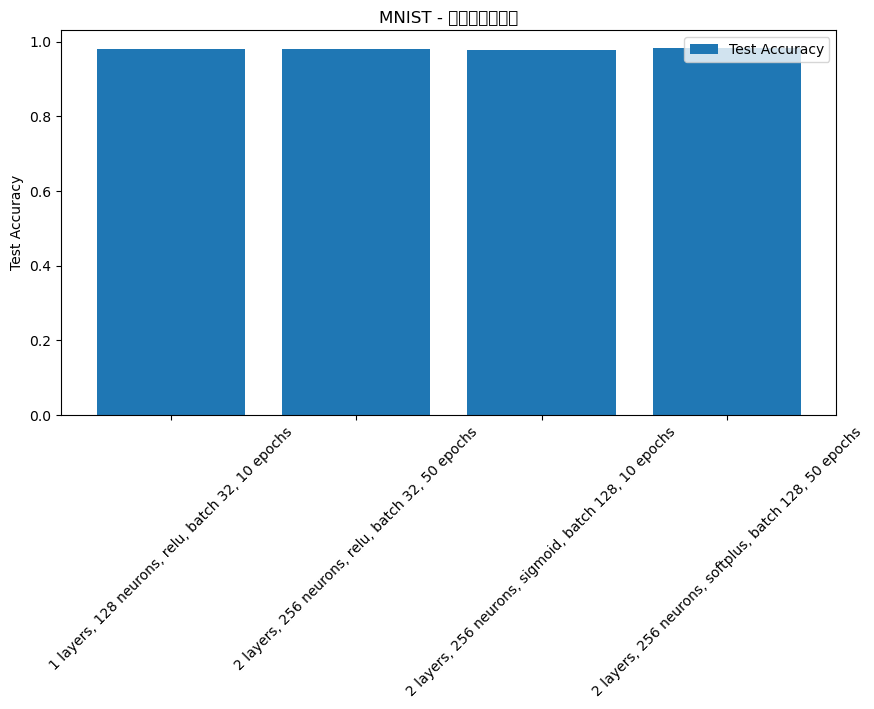

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


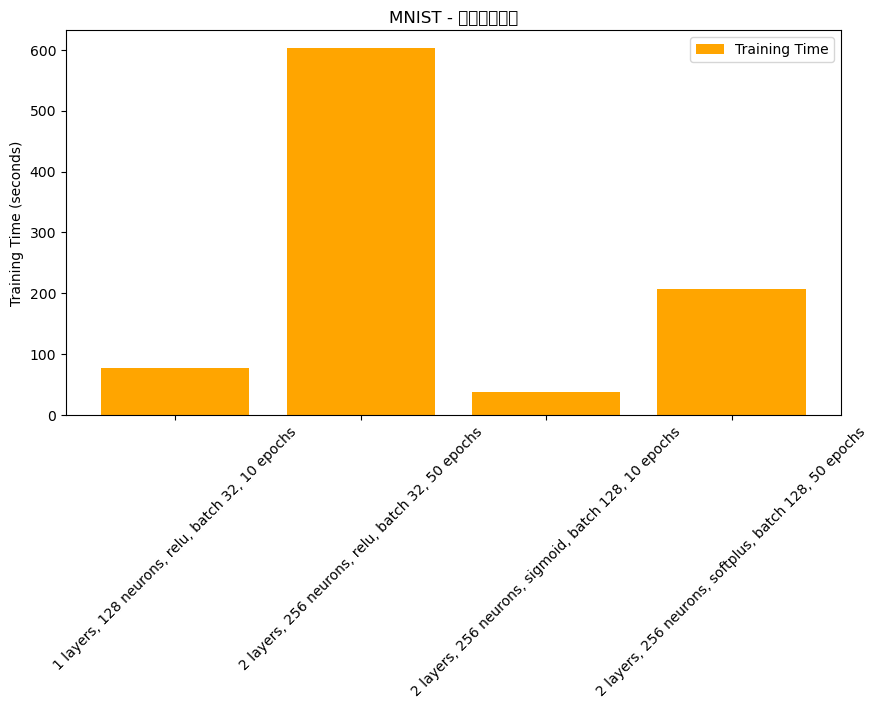

In [6]:
# 繪製準確率與訓練時間比較圖
plt.figure(figsize=(10, 5))
labels = results_mnist.keys()
accuracy_values = [v[0] for v in results_mnist.values()]
training_times = [v[1] for v in results_mnist.values()]

plt.bar(labels, accuracy_values, label='Test Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Test Accuracy')
plt.title('MNIST - 測試準確率比較')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(labels, training_times, label='Training Time', color='orange')
plt.xticks(rotation=45)
plt.ylabel('Training Time (seconds)')
plt.title('MNIST - 訓練時間比較')
plt.legend()
plt.show()


In [7]:
# 顯示最好的模型結果
best_model_config = max(results_mnist, key=lambda x: results_mnist[x][0])
best_acc, best_time = results_mnist[best_model_config]
print(f"最佳模型: {best_model_config}")
print(f"準確率: {best_acc:.4f}, 訓練時間: {best_time:.2f} 秒")

最佳模型: 2 layers, 256 neurons, softplus, batch 128, 50 epochs
準確率: 0.9817, 訓練時間: 206.45 秒
